 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [4]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'
timedelta

datetime.timedelta

In [16]:
class Video:
    def __init__(self):
        self.title = None
        self.length = timedelta
        self.link = generic_image

    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))


    def pause(self):
        print("Video Paused")

    def __repf__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
        

Now playing Cool video


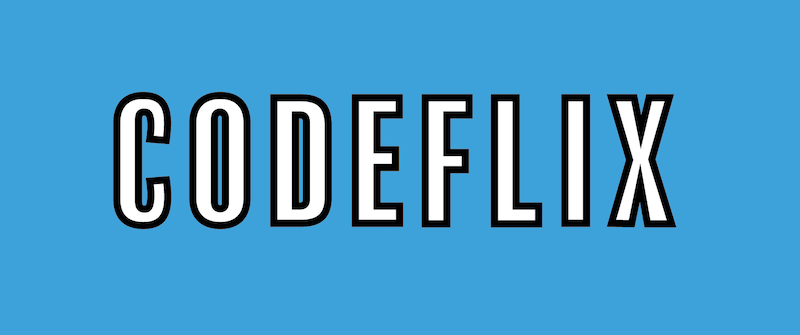

In [17]:
vid = Video()
vid.title = 'Cool video'
vid.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [19]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']

In [20]:
episode_1 = Episode()
episode_1.__dict__

TypeError: __init__() missing 1 required positional argument: 'data'

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [28]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []

    def get_info(self, choice= ''):
        data = None   
        while not data:
            if not choice:
                choice = input('What is the name of the Series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={choice}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")
            choice = ''

        self.id = data['id']
        self.title = data['name']
        self.genres = [ genre for genre in data['genres']]
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']

        #API call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f'Episode error: status code {r.status_code}')
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [ Episode(ep) for ep in episodes  ]
        print(f"{self.title} has {len(self)} episodes")

    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/n")
                if watching.lower() not in ('yes,y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)

    def __len__(self):
        return len(self.episodes)
    def __repr__(self):
        return f"Title: {self.title}"

In [21]:
first_show = Series()
first_show.get_info()

Naruto has 220 episodes


Title: Naruto: Shippuuden
500
Now playing 帰郷


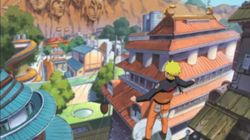

Now playing 暁、始動


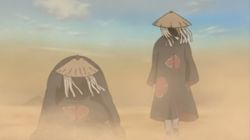

Now playing 修業の成果


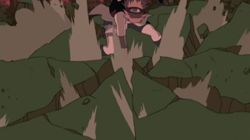

In [51]:
print(first_show)
print(len(first_show))
first_show.play()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [34]:
import random

class Theater:
    def __init__(self):
        self.users = []
        self.watchlist = []
        self.current_user = None

    def add_user(self, name= ''):
        if not name:
            name = input('What is the name of your new user? ')
            self.users.append(name)

    def choose_user(self):
        while True:
            print('Users')
            for user in self.users:
                print(user)
            current = input('Choose a user')
            if current in self.users:
                self.current_user = current
                print(f'{self.current_user} is now watching')
                break
            else:
                print('f{current} is not a user.')
    
    def add_to_watchlist(self):
        show = Series()
        show.get_info()
        self.watchlist.append(show)
        print(f'{show.title} has been added to your watchlist')

    def random(self):
        show = Series()
        show_list = ['the office', 'the golden girls', 'friends', 'how i met your mother', 'naruto shippuden', 'seinfeld', 'curb your enthusiasm', 'attack on titan']
        choice = random.choice(show_list)
        show.get_info(choice)
        self.watchlist.append(show)
        print(f'{show.title} has been added to your watchlist')

    def choose_from_watchlist(self):
        for series in self.watchlist:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f'\nSummary: \n{str(series.summary)}')
        
        watch = input('What do you want to watch?')
        
        for series in self.watchlist:
            if series.title.lower() == watch.lower():
                series.play()
        response = input(f"{watch} is not in your watchlist. Would you like to add it? y/n")
        if response in ('y','yes'):
            self.add_to_watchlist()
            self.watchlist[-1].play()


    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """

        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name 
        print(self.current_user)
        print(""" 
            What would you like to do?

            Serch - Serch for shows
            Watch - Pick something from your watchlist
            Random- Dont know what to watch? We can choose for you!
            Add   - Add a new user
            Quit  - Close the app
        """)

        while True:
            response = input("What would you like to do? (search, random, watch, add, quit")

            if response.lower() == 'search':
                self.add_to_watchlist()
            elif response.lower() == 'watch':
                self.choose_from_watchlist()
            elif response.lower() == 'add':
                self.add_user()
                self.choose_user()


            elif response.lower() == 'random':
                self.random()


            elif response.lower() == 'quit':
                print("Thanks for watching...")
                break
            else:
                print('Incorrect input... Try Again.')

In [ ]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [ ]:
import random

class Random(Theater):

    def random(self):
        show_list = ['the office', 'the golden girls', 'friends', 'how i met your mother', 'will & grace', 'seinfeld']
        show_choice = random.choice(show_list)
        